## 讀入假資料練習

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [4]:
df = pd.read_csv("https://bitly.com/gradescsv")

In [6]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


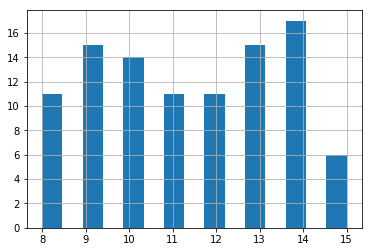

In [14]:
df.國文.hist(bins=15)

### 基本資料分析

In [16]:
df.國文.mean()

11.39

In [17]:
df.國文.std()

2.1968526614594834

In [19]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


In [20]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


In [21]:
df.國文.corr(df.數學)

-0.3108989822179331

### 加入總級分

In [27]:
df["總級分"] = df.sum(axis=1)

In [29]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


In [31]:
df["加權"] = df.數學*2 + df.國文*1.5 + df.英文*1.5

### 排序

In [33]:
df.sort_values(by="總級分", ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,66,66.0
12,李正偉,11,15,11,14,15,66,61.0
54,陳怡潔,15,15,9,15,11,65,63.0
25,蔡亦瑄,13,13,14,13,12,65,67.0
57,胡淳茜,12,15,14,13,11,65,68.5
37,曾怡君,11,12,15,13,14,65,64.5
48,陳怡婷,15,14,12,9,15,65,67.5
64,俞志峰,9,14,13,14,15,65,60.5
83,李士賢,10,14,15,13,13,65,66.0
87,趙偉希,10,13,14,13,15,65,62.5


In [35]:
df2 = df.sort_values(by=["加權", "總級分"], ascending=False)

In [36]:
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,72.0
57,胡淳茜,12,15,14,13,11,65,68.5
48,陳怡婷,15,14,12,9,15,65,67.5
36,詹威德,12,13,15,10,14,64,67.5
25,蔡亦瑄,13,13,14,13,12,65,67.0


### 重設左邊index

In [37]:
df2.index = list(range(1, 101))

In [38]:
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,72.0
2,胡淳茜,12,15,14,13,11,65,68.5
3,陳怡婷,15,14,12,9,15,65,67.5
4,詹威德,12,13,15,10,14,64,67.5
5,蔡亦瑄,13,13,14,13,12,65,67.0


### 篩選資料
找出數學滿級分

In [46]:
df2[df2["數學"]==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,72.0
4,詹威德,12,13,15,10,14,64,67.5
9,李士賢,10,14,15,13,13,65,66.0
11,曾怡君,11,12,15,13,14,65,64.5
12,林哲法,14,9,15,10,14,62,64.5
18,陳竹伯,10,12,15,10,14,61,63.0
19,葉儀依,9,13,15,8,14,59,63.0
21,周育霖,9,12,15,13,12,61,61.5
25,張雅彬,10,11,15,12,8,56,61.5
27,芮秋辛,11,10,15,10,8,54,61.5


### 拿掉column


In [49]:
df2.drop("總級分", axis=1, inplace=True)

In [52]:
df2.head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,72.0
2,胡淳茜,12,15,14,13,11,68.5
3,陳怡婷,15,14,12,9,15,67.5
4,詹威德,12,13,15,10,14,67.5
5,蔡亦瑄,13,13,14,13,12,67.0


### 拿掉row

In [55]:
df2[df2.姓名=="劉麗芬"]

,姓名,國文,英文,數學,自然,社會,加權
29,劉麗芬,8,14,14,14,14,61.0


In [57]:
df2.drop(df2[df2.姓名 == "劉麗芬"].index).head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,72.0
2,胡淳茜,12,15,14,13,11,68.5
3,陳怡婷,15,14,12,9,15,67.5
4,詹威德,12,13,15,10,14,67.5
5,蔡亦瑄,13,13,14,13,12,67.0


In [58]:
mydata = np.random.randn(4,3)

In [59]:
mydata

array([[-0.80335959, -0.8052111 ,  0.75122315],
       [ 1.31310393, -0.57981162,  0.86731716],
       [ 1.47177975,  1.74730056,  0.40441087],
       [ 1.21742254,  1.18117364, -0.34050934]])

In [63]:
df = pd.DataFrame(mydata, columns=list('ABC'))

In [64]:
df

,A,B,C
0,-0.803360,-0.805211,0.751223
1,1.313104,-0.579812,0.867317
2,1.471780,1.747301,0.404411
3,1.217423,1.181174,-0.340509


In [70]:
mydata2 = np.random.randn(3,3)

In [71]:
df2 = pd.DataFrame(mydata2, columns=list('ABC'))

In [72]:
df2

,A,B,C
0,-0.302807,-0.005655,-0.499536
1,-1.280468,-0.788313,1.840673
2,-0.924185,-1.257802,0.424188


### 把兩個 df連起來

In [73]:
pd.concat([df, df2], axis=0)

,A,B,C
0,-0.803360,-0.805211,0.751223
1,1.313104,-0.579812,0.867317
2,1.471780,1.747301,0.404411
3,1.217423,1.181174,-0.340509
0,-0.302807,-0.005655,-0.499536
1,-1.280468,-0.788313,1.840673
2,-0.924185,-1.257802,0.424188


In [74]:
pd.concat([df, df2], axis=1)

,A,B,C,A,B,C
0,-0.803360,-0.805211,0.751223,-0.302807,-0.005655,-0.499536
1,1.313104,-0.579812,0.867317,-1.280468,-0.788313,1.840673
2,1.471780,1.747301,0.404411,-0.924185,-1.257802,0.424188
3,1.217423,1.181174,-0.340509,NaN,NaN,NaN
